In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway  

from scipy.stats import kruskal


In [5]:
benin = pd.read_csv("../data/benin_clean.csv")
sierra = pd.read_csv("../data/sieraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# country labels
benin["Country"] = "Benin"
sierra["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# Combining
df_all = pd.concat([benin, sierra, togo], ignore_index=True)


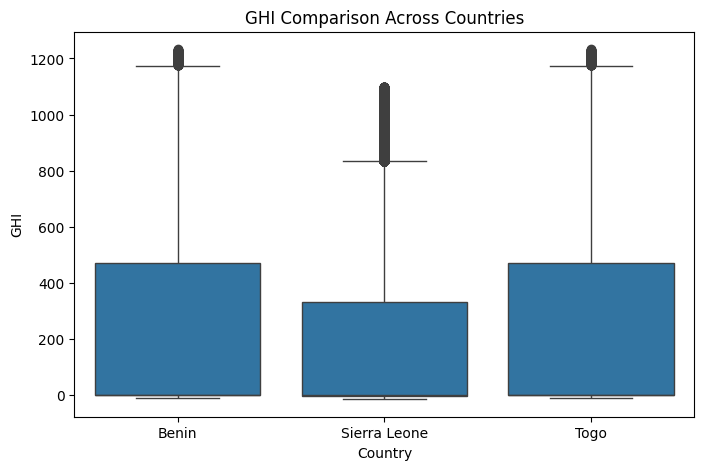

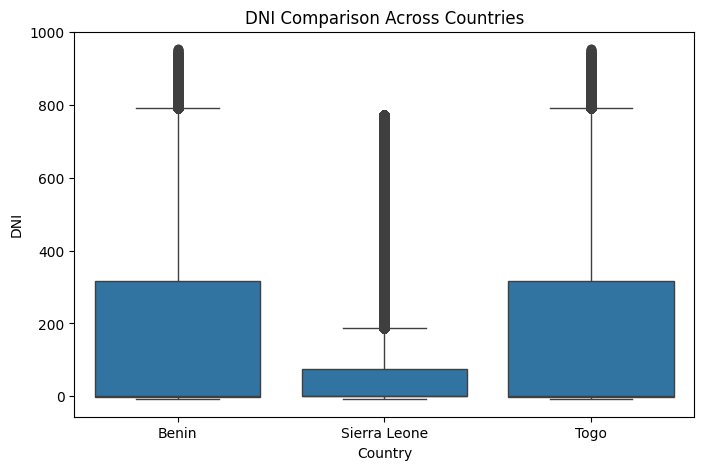

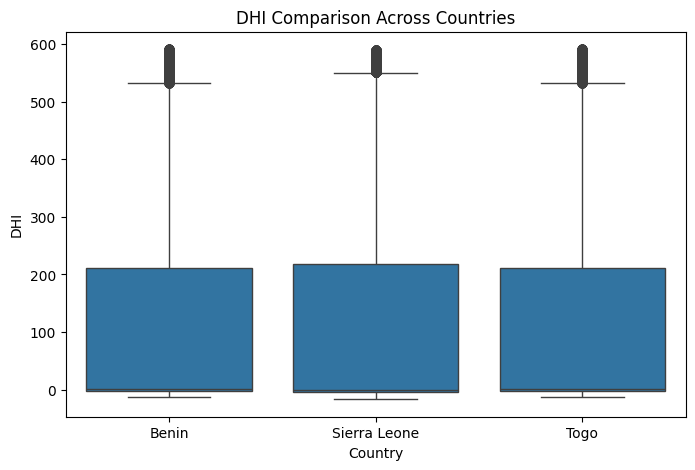

In [6]:
for metric in ["GHI", "DNI", "DHI"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Country", y=metric, data=df_all)
    plt.title(f"{metric} Comparison Across Countries")
    plt.show()


In [7]:
summary = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
display(summary)


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          153.10

In [8]:
f_stat, p_value = f_oneway(
    benin["GHI"].dropna(),
    sierra["GHI"].dropna(),
    togo["GHI"].dropna()
)

print("ANOVA Test on GHI")
print("F-statistic:", f_stat)
print("p-value:", p_value)


ANOVA Test on GHI
F-statistic: 4576.715873652364
p-value: 0.0


In [9]:
stat, p_val = kruskal(
    benin["GHI"].dropna(),
    sierra["GHI"].dropna(),
    togo["GHI"].dropna()
)

print("Kruskal-Wallis Test on GHI")
print("H-statistic:", stat)
print("p-value:", p_val)


Kruskal-Wallis Test on GHI
H-statistic: 6426.766406433574
p-value: 0.0


### Key Observations

- **Benin and Togo have nearly identical solar profiles**, with the highest average and median GHI (236.23 and 0.7, respectively), indicating strong solar potential in both countries.
- **Sierra Leone has the lowest average GHI (185.00)** and the highest variability in DHI (std = 153.69), suggesting it may have more fluctuating solar conditions.
- **Direct Normal Irradiance (DNI) is lower on average in Sierra Leone (104.13)** compared to Benin and Togo (both 166.90), which could affect the performance of concentrating solar technologies in that region.


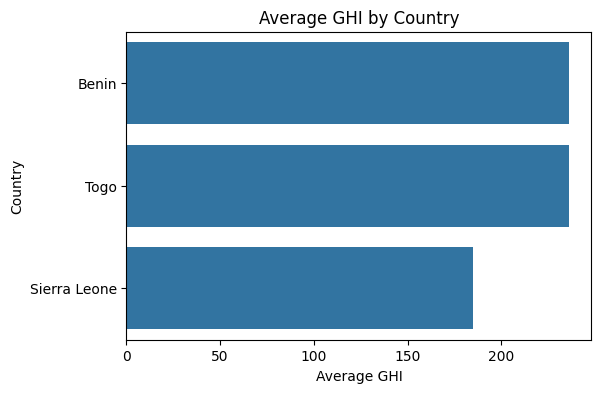

In [11]:
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index)
plt.title("Average GHI by Country")
plt.xlabel("Average GHI")
plt.ylabel("Country")
plt.show()
